# Introduction

Some very rudimentary snippets of code illustrating how load data from the MENTORSHIP dataset. Data is described in this preprint: Ke et al. A dataset of mentorship in science with semantic and demographic estimations. arXiv 2106.06487v1. https://arxiv.org/pdf/2106.06487.pdf

In [1]:
# load required libraries
import pickle
import pathlib
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [2]:
home_dir = pathlib.Path(path.expanduser("~"))

# Load information about researchers and their mentoring relationships

In [4]:
connect = pd.read_csv(home_dir / 'datasets' / 's4' / 'MENTORSHIP' / 'mentorship.csv')
people = pd.read_csv(home_dir / 'datasets' / 's4' / 'MENTORSHIP' / 'researcher.csv')

In [5]:
connect.columns

Index(['CID', 'MenteeID', 'MentorID', 'MentorshipType', 'Institution',
       'InstitutionMAGID', 'StartYear', 'StopYear'],
      dtype='object')

In [6]:
people.columns

Index(['PID', 'FirstName', 'MiddleName', 'LastName', 'Institution',
       'InstitutionMAGID', 'ResearchArea', 'ORCID', 'MAGAuthorID'],
      dtype='object')

In [ ]:
connect = connect[['CID','MenteeID','MentorID','MentorshipType','Institution','StopYear']]
people = people[['PID','FirstName','MiddleName','LastName','Institution','ResearchArea']]

Link names to connections

In [7]:
connect_names = connect.merge(people[['PID','FirstName','MiddleName','LastName','ResearchArea']], how='inner', left_on='MenteeID', right_on='PID')
connect_names = connect_names.merge(people[['PID','FirstName','MiddleName','LastName','ResearchArea']], how='inner', left_on='MentorID', 
                                    right_on='PID', suffixes=['_t','_m'])

connect_names.head()

,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear,PID_t,FirstName_t,MiddleName_t,LastName_t,ResearchArea_t,PID_m,FirstName_m,MiddleName_m,LastName_m,ResearchArea_m
0,2,2,3,1,"University of California, Berkeley",95457486.0,2000,2005,2,BENJAMIN,Y,HAYDEN,neuro,3,JACK,L,GALLANT,"neuro,psych"
1,3,4,3,2,"University of California, Berkeley",95457486.0,2003,2006,4,BENJAMIN,NaN,WILLMORE,neuro,3,JACK,L,GALLANT,"neuro,psych"
2,5,6,3,1,"University of California, Berkeley",95457486.0,2002,2008,6,RYAN,NaN,PRENGER,neuro,3,JACK,L,GALLANT,"neuro,psych"
3,17,27,3,1,"University of California, Berkeley",95457486.0,-1,-1,27,JOSEPH,P,ROGERS,neuro,3,JACK,L,GALLANT,"neuro,psych"
4,18,28,3,2,"University of California, Berkeley",95457486.0,-1,-1,28,RACHEL,NaN,SHOUP,neuro,3,JACK,L,GALLANT,"neuro,psych"


# Find a researcher and their trainees

Simple string match to first and last name

In [16]:
row = people.loc[(people.FirstName=='ERIC') & (people.LastName=='KANDEL')]
PID = row.PID.values[0]
print(f"matching PID={PID}")

matching PID=331


Connect table links PID_m (mentor PID) to PID_t (trainee PIDs)

In [19]:
connect_names.loc[connect_names.PID_m==PID,['PID_t','FirstName_t','MiddleName_t','LastName_t','ResearchArea_t']]

,PID_t,FirstName_t,MiddleName_t,LastName_t,ResearchArea_t
7368,334,J,DAVID,SWEATT,neuro
7369,355,IRVING,NaN,KUPFERMANN,neuro
7370,356,TOM,NaN,CAREW,neuro
7371,357,HAROLD,NaN,PINSKER,neuro
7372,354,JAMES,H,SCHWARTZ,neuro
...,...,...,...,...,...
7460,767246,EUGENE,P,BRANDON,neuro
7461,767647,JUAN,MARCOS,ALARCON,neuro
7462,76072,BENNY,NaN,HOCHNER,neuro
7463,800683,PO-TAO,NaN,CHEN,neuro


In [44]:
trainee_PID = connect_names.loc[connect_names.PID_m==PID,'PID_t'].values
trainee_PID

array([   334,    355,    356,    357,    354,    899,    953,    954,
          956,   1346,   1481,   1906,   2193,   2215,   2221,   2223,
         2333,   2603,   3070,   3373,   3441,   3442,   3528,   3439,
         4086,   4995,   5657,   6367,  58611,   6674,   6202,   8933,
         9843,  10030,  11892,  12008,  13423,  13436,  13480,  13552,
         7299,  15424,  16069,  16727,   2248,  11427,  18132,  17179,
        20649,   7078,  22763,  23049,  23356,  23363,  23785,  25998,
        11043,  26587,  26644,   2220,  29321,  29368,  19353,  32885,
        24722,  38092,  30421,  47779,  48781,  50175,  50444,  50835,
        50954,  56551,  58317,  60353,  61614,  65230,  34641,  65991,
        66614,  74996,  83578,  91626, 173942,  51431,  10680,  82051,
       737509, 750864, 751257,  20002, 767246, 767647,  76072, 800683,
        48450])

# Find publications associated with a researcher

MAGPaperID is the unique identifier for papers in the MAG database. Note that this code matches to Papers.csv, which is a subset of the entire MAG corpus!

In [20]:
pid_magid = pd.read_csv(home_dir / 'datasets' / 's4' / 'MENTORSHIP' / 'authorship.csv')

In [22]:
pid_magid.loc[pid_magid.PID==PID]

,PID,MAGPaperID
41025,331,111832100
41026,331,1216687283
41027,331,132816808
41028,331,1427063205
41029,331,144537577
...,...,...
41632,331,67755273
41633,331,6776920
41634,331,79844685
41635,331,84539758


In [31]:
matched_magid = pid_magid.loc[pid_magid.PID==PID].copy()

Subset of MAG papers is stored in Papers.csv. Full set is in Papers.txt, but this requires a more sophisticated loading routine because it cannot fit in memory.

In [23]:
Papers = pd.read_csv('~/datasets/s4/MAG/Papers.csv')

Note that the inner join will throw out MAG paper IDs that aren't included in the Papers.csv subsample!!!

In [33]:
matched_Papers = matched_magid.merge(Papers,how='inner',left_on='MAGPaperID',right_on='PaperId')

In [36]:
matched_Papers.head()

,PID,MAGPaperID,PaperId,Rank,Doi,DocType,PaperTitle,OriginalTitle,BookTitle,Year,...,ConferenceSeriedId,ConferenceInstanceId,Volume,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,EstimatedCitation,OriginalVenue
0,331,1884538784,1884538784,21511,10.1523/JNEUROSCI.01-12-01426.1981,Journal,classical conditioning in a simple withdrawal ...,Classical conditioning in a simple withdrawal ...,NaN,1981,...,NaN,NaN,1.0,12.0,1426,1437,29,219,315,The Journal of Neuroscience
1,331,1974195264,1974195264,20342,10.1101/GAD.9.15.1909,Journal,focal adhesion kinase in the brain novel subce...,Focal adhesion kinase in the brain: novel subc...,NaN,1995,...,NaN,NaN,9.0,15.0,1909,1921,42,131,197,Genes & Development
2,331,2090501101,2090501101,18612,10.1126/SCIENCE.1361685,Journal,impaired long term potentiation spatial learni...,"Impaired long-term potentiation, spatial learn...",NaN,1992,...,NaN,NaN,258.0,5090.0,1903,1910,53,1028,1313,Science
3,331,2281752205,2281752205,22090,10.1152/JN.1961.24.3.272,Journal,electrophysiology of hippocampal neurons iv fa...,ELECTROPHYSIOLOGY OF HIPPOCAMPAL NEURONS: IV. ...,NaN,1961,...,NaN,NaN,24.0,3.0,272,285,0,397,631,Journal of Neurophysiology


# Load average SPECTER embeddings

Average projection of specter embeddings for all publications associated with an AFT researcher are stored in `researcher_specter.pkl`.

Each researcher is uniquely identified by the `PID` field, which can be used to link to researcher data in other tables.

Load specter embeddings (currently only loading first 200 of 768 dimensions)

In [ ]:
fn = home_dir / 'datasets' / 's4' / 'MENTORSHIP' / 'researcher_specter.pkl'
print(f'Loading {fn}:')

fin = open(fn, 'rb')
unpickler = pickle.Unpickler(fin)

N = 494455
keepdims = 200  # only save first 200 dimensions of specter embedding, 768 stored in this file

pid = np.zeros(N)
specter = np.zeros((N,keepdims))
for i in range(N):
    d = unpickler.load()
    pid[i]=d[0]
    specter[i,:]=d[1][:keepdims]
    
    if i % 50000 == 0:
        print(f"{i}. pid {d[0]} top 6 dim values: {d[1][0]:.3f}, {d[1][1]:.3f}, {d[1][2]:.3f}, {d[1][3]:.3f}, {d[1][4]:.3f}, {d[1][5]:.3f}")
    

fin.close()

if keepdims>=455:
    # hack : rescale outlier dimension to have (mean,std) ~ (0,1)
    specter[i,454] = (specter[i,454]+11)/2


Link SPECTER embeddings to mentor and trainee PIDs identified above

In [58]:
mentor_match = np.in1d(pid, PID)
mentor_specter = specter[mentor_match,:]
trainee_match=np.in1d(pid, trainee_PID)
trainee_specter = specter[trainee_match,:]

N=trainee_specter.shape[0]

print(f"Found SPECTER weights for {N}/{len(trainee_PID)} trainees of PID {PID}")

Found SPECTER weights for 90/97 trainees of PID 331


Look at the raw data, and demo cosine distance measurement.

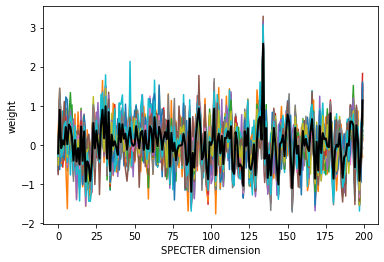

In [59]:
plt.plot(trainee_specter.T)
plt.plot(mentor_specter.T,'k',linewidth=2)

plt.xlabel('SPECTER dimension')
plt.ylabel('weight');

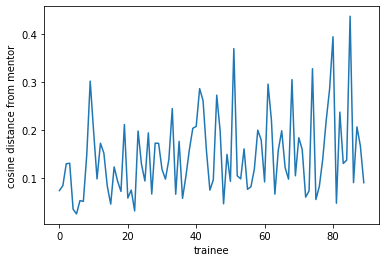

In [60]:
c = np.zeros(N)
for i in range(N):
    c[i]=distance.cosine(trainee_specter[i],mentor_specter[0])
plt.plot(c)
plt.xlabel('trainee')
plt.ylabel('cosine distance from mentor');

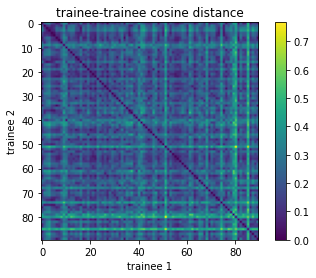

In [61]:
c = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        c[i,j]=distance.cosine(trainee_specter[i],trainee_specter[j])

plt.imshow(c)
plt.colorbar();
plt.xlabel('trainee 1')
plt.ylabel('trainee 2')
plt.title('trainee-trainee cosine distance');